# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8 )


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [4]:
from sklearn import linear_model
boston_model = linear_model.LinearRegression().fit(X_train, y_train)

## 3. Calculate and print R-squared for both the training and the testing set.

In [5]:
y_pred_train = boston_model.predict(X_train)
from sklearn.metrics import r2_score
r_squared_train = r2_score(y_train, y_pred_train)
print("R**2 (train) =",r_squared_train)

y_pred_test = boston_model.predict(X_test)
r_squared_test = r2_score(y_test, y_pred_test)
print("R**2 (test) =",r_squared_test)

R**2 (train) = 0.7638542127072072
R**2 (test) = 0.6355948712727195


## 4. Calculate and print mean squared error for both the training and the testing set.

In [6]:
from sklearn.metrics import mean_squared_error

print("RMSE (train) =",mean_squared_error(y_train, y_pred_train, squared=False))

print("RMSE (test) =",mean_squared_error(y_test, y_pred_test, squared=False))

RMSE (train) = 4.377413348509003
RMSE (test) = 5.92358094151925


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [7]:
from sklearn.metrics import mean_absolute_error

print("MAE (train) =",mean_absolute_error(y_train, y_pred_train))

print("MAE (test) =",mean_absolute_error(y_test, y_pred_test))

MAE (train) = 3.060252817075481
MAE (test) = 3.9179340412005192


## Classification Model Evaluation

In [8]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8 )

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [10]:
from sklearn.linear_model import LogisticRegression
model_fit = LogisticRegression(random_state=0,max_iter=500).fit(X_train, y_train.values.ravel())

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_train = model_fit.predict(X_train)
print("Accuracy score (train): ",accuracy_score(y_train, y_pred_train))
y_pred_test = model_fit.predict(X_test)
print("Accuracy score (test): ",accuracy_score(y_test, y_pred_test))


Accuracy score (train):  0.9666666666666667
Accuracy score (test):  0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [12]:
from sklearn.metrics import balanced_accuracy_score


print("Balanced accuracy score (train): ",accuracy_score(y_train, y_pred_train))
print("Balanced accuracy score (test): ",accuracy_score(y_test, y_pred_test))

Balanced accuracy score (train):  0.9666666666666667
Balanced accuracy score (test):  0.9666666666666667


## 10. Calculate and print the precision score for both the training and the testing set.

In [13]:
from sklearn.metrics import precision_score
print("For each category:")
print("Precision score (train): ",precision_score(y_train, y_pred_train, average=None))
print("Precision score (test): ",precision_score(y_test, y_pred_test, average=None))

print("Counting the total true positives, false negatives and false positives:")
print("Precision score (train): ",precision_score(y_train, y_pred_train, average="micro"))
print("Precision score (test): ",precision_score(y_test, y_pred_test, average="micro"))

For each category:
Precision score (train):  [1.         0.975      0.92682927]
Precision score (test):  [1.         0.88888889 1.        ]
Counting the total true positives, false negatives and false positives:
Precision score (train):  0.9666666666666667
Precision score (test):  0.9666666666666667


## 11. Calculate and print the recall score for both the training and the testing set.

In [14]:
from sklearn.metrics import recall_score
print("For each category:")
print("Recall score (train): ",recall_score(y_train, y_pred_train, average=None))
print("Recall score (test): ",recall_score(y_test, y_pred_test, average=None))

print("Counting the total true positives, false negatives and false positives:")
print("Precision score (train): ",recall_score(y_train, y_pred_train, average="micro"))
print("Precision score (test): ",recall_score(y_test, y_pred_test, average="micro"))

For each category:
Recall score (train):  [1.         0.92857143 0.97435897]
Recall score (test):  [1.         1.         0.90909091]
Counting the total true positives, false negatives and false positives:
Precision score (train):  0.9666666666666667
Precision score (test):  0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [15]:
from sklearn.metrics import f1_score

print("For each category:")
print("F1 score score (train): ",f1_score(y_train, y_pred_train, average=None))
print("F1 score score (test): ",f1_score(y_test, y_pred_test, average=None))

print("Counting the total true positives, false negatives and false positives:")
print("F1 score score (train): ",f1_score(y_train, y_pred_train, average="micro"))
print("F1 score score (test): ",f1_score(y_test, y_pred_test, average="micro"))

For each category:
F1 score score (train):  [1.         0.95121951 0.95      ]
F1 score score (test):  [1.         0.94117647 0.95238095]
Counting the total true positives, false negatives and false positives:
F1 score score (train):  0.9666666666666667
F1 score score (test):  0.9666666666666667


## 13. Generate confusion matrices for both the training and the testing set.

In [16]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix (train): ")
print(confusion_matrix(y_train, y_pred_train))

Confusion matrix (train): 
[[39  0  0]
 [ 0 39  3]
 [ 0  1 38]]


In [17]:
print("Confusion matrix (test): ")
print(confusion_matrix(y_test, y_pred_test))

Confusion matrix (test): 
[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

## Regression Model Evaluation  ----  KNN

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [18]:
data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8 )



## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [19]:
import statsmodels.api as smf

X_train_c = smf.add_constant(X_train)
multi_lm = smf.OLS(y_train,X_train_c).fit()

## 3. Calculate and print R-squared for both the training and the testing set.

In [20]:
y_pred_train = multi_lm.predict(X_train_c)
r_squared_train = r2_score(y_train, y_pred_train)
print("R**2 (train) =",r_squared_train)

y_pred_test = multi_lm.predict(smf.add_constant(X_test))
r_squared_test = r2_score(y_test, y_pred_test)
print("R**2 (test) =",r_squared_test)

R**2 (train) = 0.7452812028552834
R**2 (test) = 0.7095417462392397


## 4. Calculate and print mean squared error for both the training and the testing set.

In [21]:

print("RMSE (train) =",mean_squared_error(y_train, y_pred_train, squared=False))

print("RMSE (test) =",mean_squared_error(y_test, y_pred_test, squared=False))

RMSE (train) = 4.708142518641453
RMSE (test) = 4.6341098131166065


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [22]:

print("MAE (train) =",mean_absolute_error(y_train, y_pred_train))

print("MAE (test) =",mean_absolute_error(y_test, y_pred_test))

MAE (train) = 3.333363064541086
MAE (test) = 3.016980595686538


## Classification Model Evaluation  ------ Random Tree

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [23]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8 )

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

params = {'min_samples_leaf':np.arange(2,22,2),
          'min_samples_split':np.arange(2,22,2),
          'max_depth':np.arange(1,6),
          'min_weight_fraction_leaf':np.arange(0,0.4,0.1)}

grid = GridSearchCV(
     estimator=DecisionTreeClassifier(),
     param_grid=params,
     verbose=1,
     scoring="accuracy",
     return_train_score=True
)

grid.fit(X_train,y_train)

pd.DataFrame(grid.cv_results_)["mean_test_score"].sort_values()

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   48.8s finished


0       0.666667
272     0.666667
271     0.666667
270     0.666667
269     0.666667
          ...   
927     0.933333
926     0.933333
936     0.933333
1999    0.933333
1204    0.941667
Name: mean_test_score, Length: 2000, dtype: float64

In [26]:
df=pd.DataFrame(grid.cv_results_)
df.loc[1204]

mean_fit_time                                                             0.0023952
std_fit_time                                                            0.000226915
mean_score_time                                                          0.00107532
std_score_time                                                           6.4301e-05
param_max_depth                                                                   4
param_min_samples_leaf                                                            2
param_min_samples_split                                                           4
param_min_weight_fraction_leaf                                                    0
params                            {'max_depth': 4, 'min_samples_leaf': 2, 'min_s...
split0_test_score                                                                 1
split1_test_score                                                          0.916667
split2_test_score                                                           

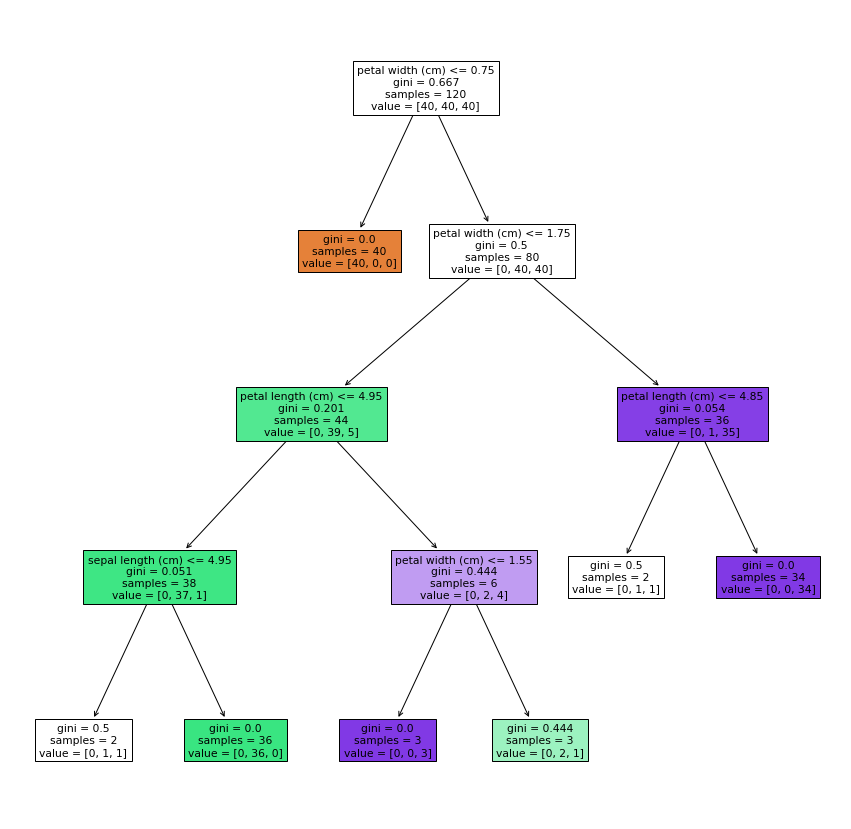

In [28]:
tree = DecisionTreeClassifier(max_depth=4,min_samples_leaf=2,min_samples_split=4,min_weight_fraction_leaf=0)
tree.fit(X_train, y_train)
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(tree, feature_names=X_train.columns, filled=True);

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [29]:

y_pred_train = tree.predict(X_train)
print("Accuracy score (train): ",accuracy_score(y_train, y_pred_train))
y_pred_test = tree.predict(X_test)
print("Accuracy score (test): ",accuracy_score(y_test, y_pred_test))


Accuracy score (train):  0.975
Accuracy score (test):  0.9666666666666667


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [30]:

print("Balanced accuracy score (train): ",accuracy_score(y_train, y_pred_train))
print("Balanced accuracy score (test): ",accuracy_score(y_test, y_pred_test))

Balanced accuracy score (train):  0.975
Balanced accuracy score (test):  0.9666666666666667


## 10. Calculate and print the precision score for both the training and the testing set.

In [31]:

print("For each category:")
print("Precision score (train): ",precision_score(y_train, y_pred_train, average=None))
print("Precision score (test): ",precision_score(y_test, y_pred_test, average=None))

print("Counting the total true positives, false negatives and false positives:")
print("Precision score (train): ",precision_score(y_train, y_pred_train, average="micro"))
print("Precision score (test): ",precision_score(y_test, y_pred_test, average="micro"))

For each category:
Precision score (train):  [1.         0.93023256 1.        ]
Precision score (test):  [1.         0.90909091 1.        ]
Counting the total true positives, false negatives and false positives:
Precision score (train):  0.975
Precision score (test):  0.9666666666666667


## 11. Calculate and print the recall score for both the training and the testing set.

In [32]:

print("For each category:")
print("Recall score (train): ",recall_score(y_train, y_pred_train, average=None))
print("Recall score (test): ",recall_score(y_test, y_pred_test, average=None))

print("Counting the total true positives, false negatives and false positives:")
print("Precision score (train): ",recall_score(y_train, y_pred_train, average="micro"))
print("Precision score (test): ",recall_score(y_test, y_pred_test, average="micro"))

For each category:
Recall score (train):  [1.    1.    0.925]
Recall score (test):  [1.  1.  0.9]
Counting the total true positives, false negatives and false positives:
Precision score (train):  0.975
Precision score (test):  0.9666666666666667


## 12. Calculate and print the F1 score for both the training and the testing set.

In [33]:


print("For each category:")
print("F1 score score (train): ",f1_score(y_train, y_pred_train, average=None))
print("F1 score score (test): ",f1_score(y_test, y_pred_test, average=None))

print("Counting the total true positives, false negatives and false positives:")
print("F1 score score (train): ",f1_score(y_train, y_pred_train, average="micro"))
print("F1 score score (test): ",f1_score(y_test, y_pred_test, average="micro"))

For each category:
F1 score score (train):  [1.         0.96385542 0.96103896]
F1 score score (test):  [1.         0.95238095 0.94736842]
Counting the total true positives, false negatives and false positives:
F1 score score (train):  0.975
F1 score score (test):  0.9666666666666667


## 13. Generate confusion matrices for both the training and the testing set.

In [34]:

print("Confusion matrix (train): ")
print(confusion_matrix(y_train, y_pred_train))

Confusion matrix (train): 
[[40  0  0]
 [ 0 40  0]
 [ 0  3 37]]


In [35]:
print("Confusion matrix (test): ")
print(confusion_matrix(y_test, y_pred_test))

Confusion matrix (test): 
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


## Regression Model Evaluation  ----  K Neares Neighbors Regression

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [36]:
data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8 )

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':np.arange(1,15,2)}

grid = GridSearchCV(
     estimator=KNeighborsRegressor(),
     param_grid=params,
     verbose=1,
     scoring="neg_mean_squared_error",
     return_train_score=True
)

grid.fit(X_train,y_train)

pd.DataFrame(grid.cv_results_)["mean_test_score"].sort_values()

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.3s finished


0   -58.624255
6   -51.595080
5   -49.149101
4   -47.786954
3   -46.923997
2   -45.508049
1   -43.343404
Name: mean_test_score, dtype: float64

In [37]:
df=pd.DataFrame(grid.cv_results_)
df.loc[1]

mean_fit_time                 0.00244551
std_fit_time                 0.000145264
mean_score_time               0.00272503
std_score_time               0.000674207
param_n_neighbors                      3
params                {'n_neighbors': 3}
split0_test_score               -44.3605
split1_test_score                -39.345
split2_test_score               -44.2162
split3_test_score               -41.0044
split4_test_score                -47.791
mean_test_score                 -43.3434
std_test_score                   2.93382
rank_test_score                        1
split0_train_score               -19.495
split1_train_score              -21.9489
split2_train_score              -20.3632
split3_train_score              -20.5706
split4_train_score              -18.1497
mean_train_score                -20.1055
std_train_score                  1.25528
Name: 1, dtype: object

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [38]:

knn = KNeighborsRegressor(3)
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

## 3. Calculate and print R-squared for both the training and the testing set.

In [39]:
y_pred_train = knn.predict(X_train)
r_squared_train = r2_score(y_train, y_pred_train)
print("R**2 (train) =",r_squared_train)

y_pred_test = knn.predict(X_test)
r_squared_test = r2_score(y_test, y_pred_test)
print("R**2 (test) =",r_squared_test)

R**2 (train) = 0.7823911468979835
R**2 (test) = 0.6899697987071066


## 4. Calculate and print mean squared error for both the training and the testing set.

In [40]:

print("RMSE (train) =",mean_squared_error(y_train, y_pred_train, squared=False))

print("RMSE (test) =",mean_squared_error(y_test, y_pred_test, squared=False))

RMSE (train) = 4.221625008426397
RMSE (test) = 5.382082150884274


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [41]:

print("MAE (train) =",mean_absolute_error(y_train, y_pred_train))

print("MAE (test) =",mean_absolute_error(y_test, y_pred_test))

MAE (train) = 2.8613861386138613
MAE (test) = 3.9539215686274507
